In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


   Applicant ID  Age  Gender Marital Status      Education Credit History  \
0             1   25    Male         Single       Graduate           Good   
1             2   35  Female        Married   Postgraduate      Excellent   
2             3   29    Male         Single       Graduate           Poor   
3             4   40  Female        Married  Undergraduate           Good   
4             5   28    Male         Single       Graduate      Excellent   

   Loan Amount  Income Employment Status Residence Area Loan Purpose  \
0        50000   60000          Employed          Urban         Home   
1       150000   85000          Employed          Urban     Business   
2        20000   40000          Employed          Rural          Car   
3        70000   75000     Self-employed       Suburban         Home   
4       100000   70000          Employed          Urban    Education   

  Approval Status  
0        Approved  
1        Approved  
2    Not Approved  
3        Approved  
4   

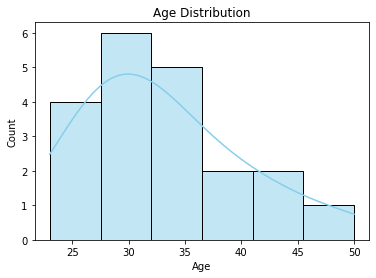

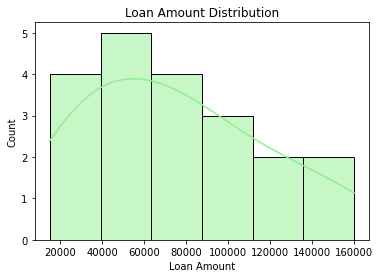

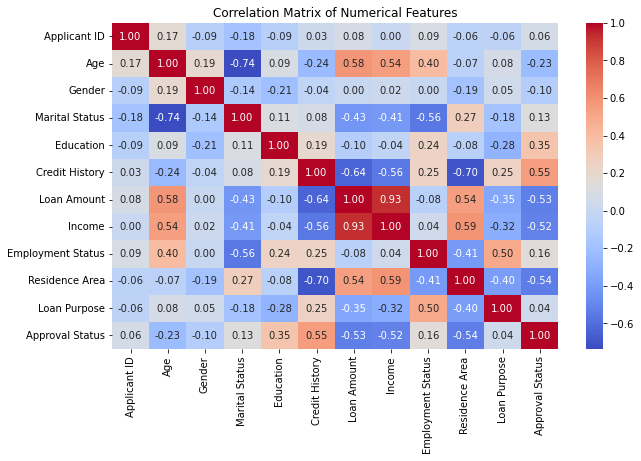

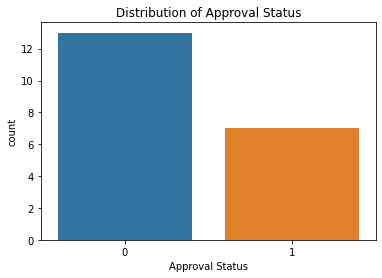

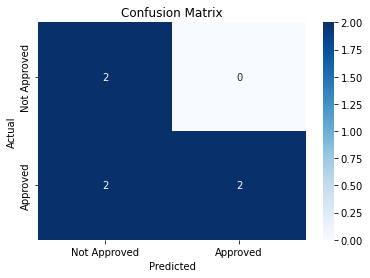

In [6]:
# Load the dataset from a CSV file
dataset = pd.read_csv('loan.csv')

# Check the first few rows of the data (optional)
print(dataset.head())

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()

# Encoding categorical columns (Gender, Marital Status, Education, Credit History, Employment Status, Residence Area, Loan Purpose, Approval Status)
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Marital Status'] = label_encoder.fit_transform(dataset['Marital Status'])
dataset['Education'] = label_encoder.fit_transform(dataset['Education'])
dataset['Credit History'] = label_encoder.fit_transform(dataset['Credit History'])
dataset['Employment Status'] = label_encoder.fit_transform(dataset['Employment Status'])
dataset['Residence Area'] = label_encoder.fit_transform(dataset['Residence Area'])
dataset['Loan Purpose'] = label_encoder.fit_transform(dataset['Loan Purpose'])
dataset['Approval Status'] = label_encoder.fit_transform(dataset['Approval Status'])  # Target variable (Approval Status)

# Define independent (X) and dependent (y) variables
X = dataset.drop('Approval Status', axis=1)  # Independent variables
y = dataset['Approval Status']  # Dependent variable (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model with a linear kernel
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Change the color of the histogram plot
sns.histplot(dataset['Age'], kde=True, color='skyblue')  # You can replace 'skyblue' with any color name or hex code
plt.title('Age Distribution')
plt.show()

# For the 'Loan Amount' column, let's change the color as well
sns.histplot(dataset['Loan Amount'], kde=True, color='lightgreen')  # Replace with your preferred color
plt.title('Loan Amount Distribution')
plt.show()


# 2. Correlation Matrix (for numerical features)
# Plot a heatmap to show the correlation between numerical features
plt.figure(figsize=(10, 6))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 3. Class Distribution (for the target variable 'Approval Status')
plt.figure(figsize=(6, 4))
sns.countplot(x='Approval Status', data=dataset)
plt.title('Distribution of Approval Status')
plt.show()

# 4. Confusion Matrix (to evaluate the model's performance)
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
